In [1]:
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, TensorBoard
from keras.layers import Input, Dropout, Dense, GlobalAveragePooling2D
from keras.models import Sequential, Model
from keras.applications.resnet import ResNet50
from keras.applications import VGG19, VGG16
from tensorboard import notebook
from tensorflow import keras 
from tensorflow.keras.applications.resnet import ResNet50
from keras import models, layers
import numpy as np
import sys
sys.path.append("/root/autodl-tmp/training_tool/")
from training_tool import load_data, draw_curve, draw_matrix, TimeHistory
from tensorflow.keras.layers import ( Input, Conv2D, BatchNormalization, ReLU, MaxPooling2D, Concatenate, GlobalMaxPooling2D, Dropout,
    Dense, Lambda, Reshape, Activation, Multiply, Add, UpSampling2D, LayerNormalization, Flatten )
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K

2024-03-16 00:18:52.209137: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [2]:
def CNN(inputs):
    
    x = Conv2D(32, 3, strides=4, padding='same')(inputs)
    x = ReLU()(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Dropout(0.1)(x)

    x = Conv2D(64, 3, strides=4, padding='same')(inputs)
    x = ReLU()(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)

    x = Conv2D(128, 3, strides=4, padding='same')(inputs)
    x = ReLU()(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Dropout(0.1)(x)

    x = Conv2D(256, 3, strides=4, padding='same')(inputs)
    x = ReLU()(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)

    x = Conv2D(512, 3, strides=4, padding='same')(inputs)
    x = ReLU()(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)


    return x


def load_model():
    K.clear_session()
    inputs = Input(shape=(224, 224, 3))

    net = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    x = net.output
    x = GlobalAveragePooling2D()(x)
    x = x * 0.3

    y = CNN(net.input)
    y = GlobalAveragePooling2D()(y)
    y = y * 0.4

    z = CNN(net.input)
    z = GlobalAveragePooling2D()(z)
    z = z * 0.4

    k = Add()([x, y, z])
    
    k = Dropout(0.5)(k)
    k = Dense(3, activation='softmax')(k)
    model = Model(inputs= net.input, outputs=k)
    
    return model



100%|██████████| 186/186 [00:01<00:00, 172.99it/s]


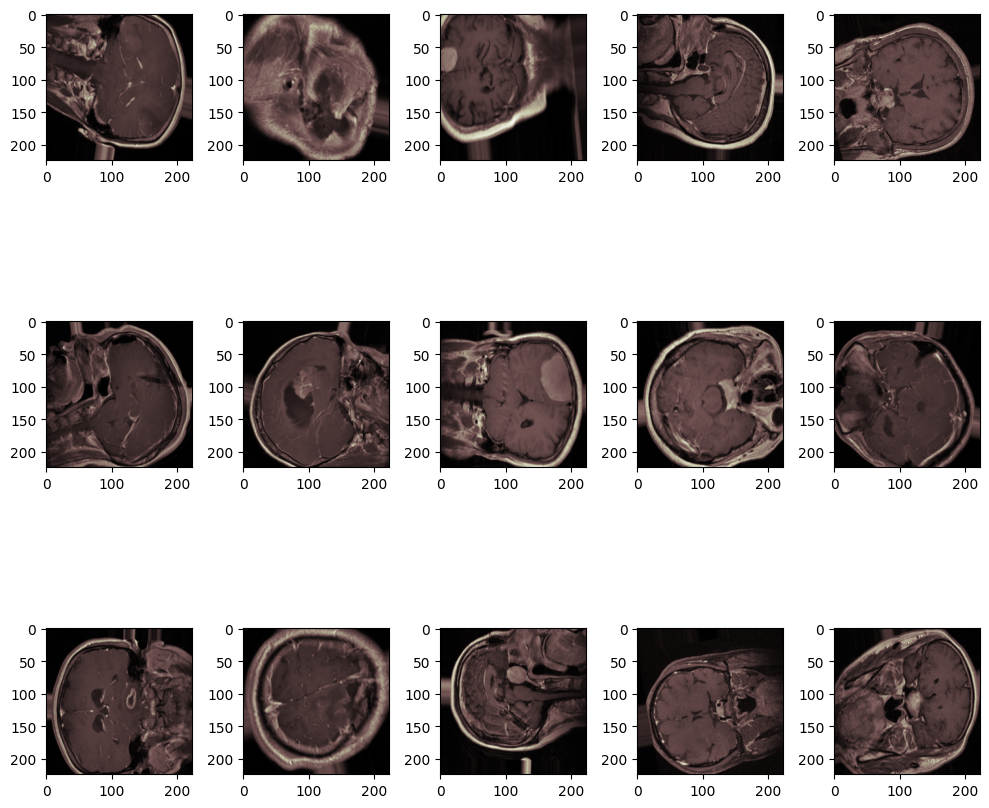

In [48]:
labels = ['glioma', 'meningioma', 'pituitary']
data_path = '/root/autodl-tmp/dataset/figshare_MBTD/augmented'
image_size = 224
x_train, x_test, y_train, y_test = load_data(data_path, labels, image_size)

In [46]:
model = load_model()
adam = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 224, 224, 64  1792        ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 block1_conv2 (Conv2D)          (None, 224, 224, 64  36928       ['block1_conv1[0][0]']           
                                )                                                             

In [49]:
tensorboard = TensorBoard(log_dir = 'logs')
Checkpoint = ModelCheckpoint(filepath='WeightedEM.h5',
                             monitor='val_accuracy', verbose=1, save_best_only=False, mode='min')
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy', factor = 0.3, patience = 5, min_delta = 0.001,
                              mode='auto',verbose=1)
time_callback = TimeHistory()
history = model.fit(x_train,y_train,validation_split=0.1, epochs =50, verbose=1, batch_size=36,
                   callbacks=[tensorboard,Checkpoint,reduce_lr, time_callback])

Epoch 1/50


2024-03-15 21:56:32.639669: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8200
2024-03-15 21:56:33.473326: W tensorflow/stream_executor/gpu/asm_compiler.cc:230] Falling back to the CUDA driver for PTX compilation; ptxas does not support CC 8.9
2024-03-15 21:56:33.473345: W tensorflow/stream_executor/gpu/asm_compiler.cc:233] Used ptxas at ptxas
2024-03-15 21:56:33.473403: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] UNIMPLEMENTED: ptxas ptxas too old. Falling back to the driver to compile.
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.
2024-03-15 21:56:34.317242: I tensorflow/stream_executor/cuda/cuda_blas.cc:1786] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


264/264 [==============================] - ETA: 0s - loss: 0.7071 - accuracy: 0.6768
Epoch 1: saving model to WeightedEM.h5
Epoch 1: 34.88 seconds
264/264 [==============================] - 35s 113ms/step - loss: 0.7071 - accuracy: 0.6768 - val_loss: 0.4237 - val_accuracy: 0.8349 - lr: 1.0000e-04
Epoch 2/50
263/264 [============================>.] - ETA: 0s - loss: 0.4339 - accuracy: 0.8316
Epoch 2: saving model to WeightedEM.h5
Epoch 2: 28.44 seconds
264/264 [==============================] - 28s 108ms/step - loss: 0.4337 - accuracy: 0.8318 - val_loss: 0.3469 - val_accuracy: 0.8776 - lr: 1.0000e-04
Epoch 3/50
263/264 [============================>.] - ETA: 0s - loss: 0.2827 - accuracy: 0.8907
Epoch 3: saving model to WeightedEM.h5
Epoch 3: 28.49 seconds
264/264 [==============================] - 28s 108ms/step - loss: 0.2826 - accuracy: 0.8907 - val_loss: 0.3821 - val_accuracy: 0.8235 - lr: 1.0000e-04
Epoch 4/50
263/264 [============================>.] - ETA: 0s - loss: 0.1637 - accur

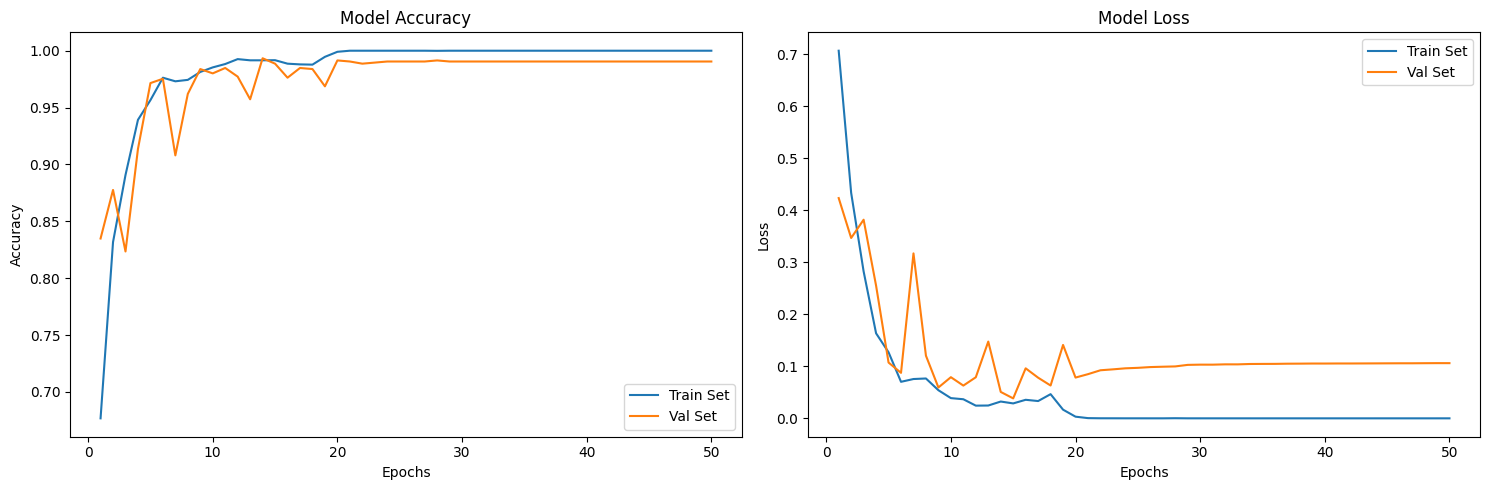

In [50]:
draw_curve(history)

20/20 [==============================] - 1s 32ms/step - loss: 0.1126 - accuracy: 0.9723
Test Accuracy:  97.23
              precision    recall  f1-score   support

      glioma     0.9756    0.9790    0.9773       286
  meningioma     0.9781    0.9437    0.9606       142
   pituitary     0.9632    0.9839    0.9734       186

    accuracy                         0.9723       614
   macro avg     0.9723    0.9689    0.9704       614
weighted avg     0.9724    0.9723    0.9723       614



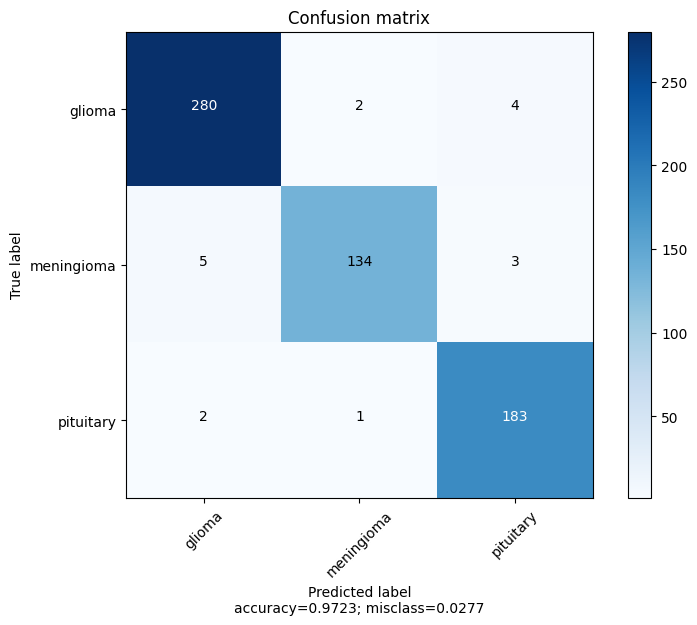

In [51]:
pred = model.predict(x_test)
pred = np.argmax(pred,axis=1)
y_test_new = np.argmax(y_test,axis=1)
loss,acc = model.evaluate(x_test,y_test,verbose = 1)
draw_matrix(labels, y_test_new, pred, acc)

In [8]:
%reset -f

100%|██████████| 186/186 [00:00<00:00, 192.07it/s]


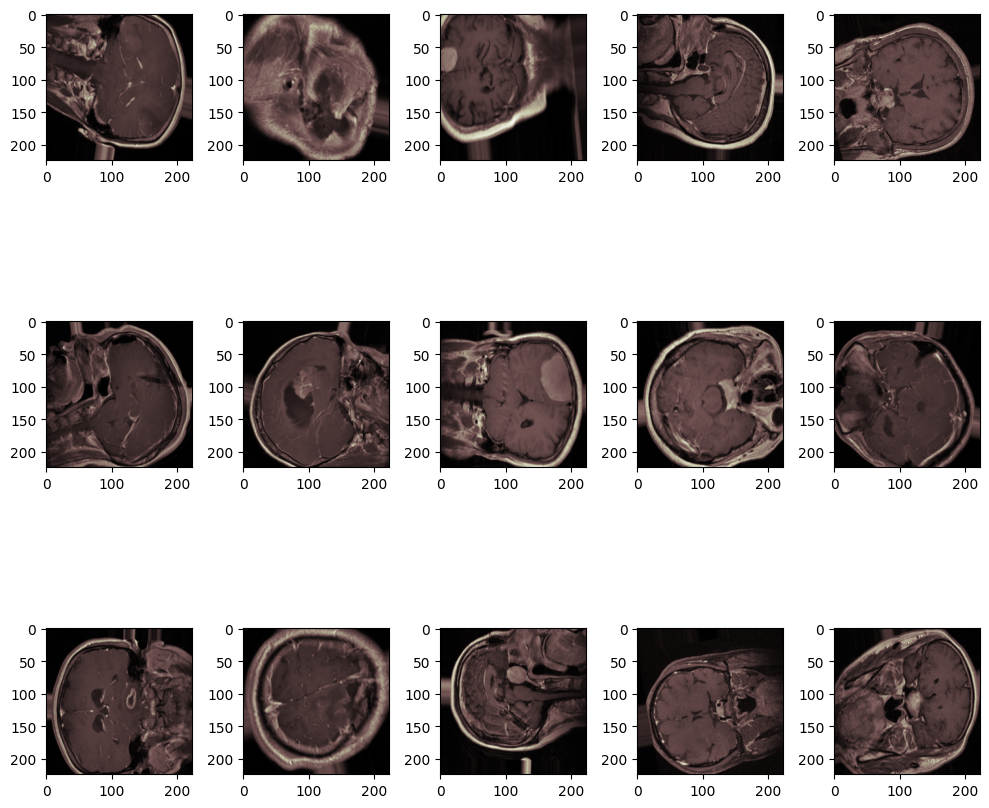

Epoch 1/50
263/264 [============================>.] - ETA: 0s - loss: 1.0991 - accuracy: 0.3616
Epoch 1: val_accuracy improved from -inf to 0.33207, saving model to WeightedEM.h5
Epoch 1: 30.48 seconds
264/264 [==============================] - 30s 110ms/step - loss: 1.0991 - accuracy: 0.3614 - val_loss: 1.0943 - val_accuracy: 0.3321 - lr: 1.0000e-04
Epoch 2/50
263/264 [============================>.] - ETA: 0s - loss: 1.0909 - accuracy: 0.3865
Epoch 2: val_accuracy improved from 0.33207 to 0.42220, saving model to WeightedEM.h5
Epoch 2: 28.48 seconds
264/264 [==============================] - 28s 108ms/step - loss: 1.0910 - accuracy: 0.3865 - val_loss: 1.0893 - val_accuracy: 0.4222 - lr: 1.0000e-04
Epoch 3/50
263/264 [============================>.] - ETA: 0s - loss: 1.0872 - accuracy: 0.4001
Epoch 3: val_accuracy improved from 0.42220 to 0.43833, saving model to WeightedEM.h5
Epoch 3: 28.44 seconds
264/264 [==============================] - 28s 108ms/step - loss: 1.0872 - accuracy: 0

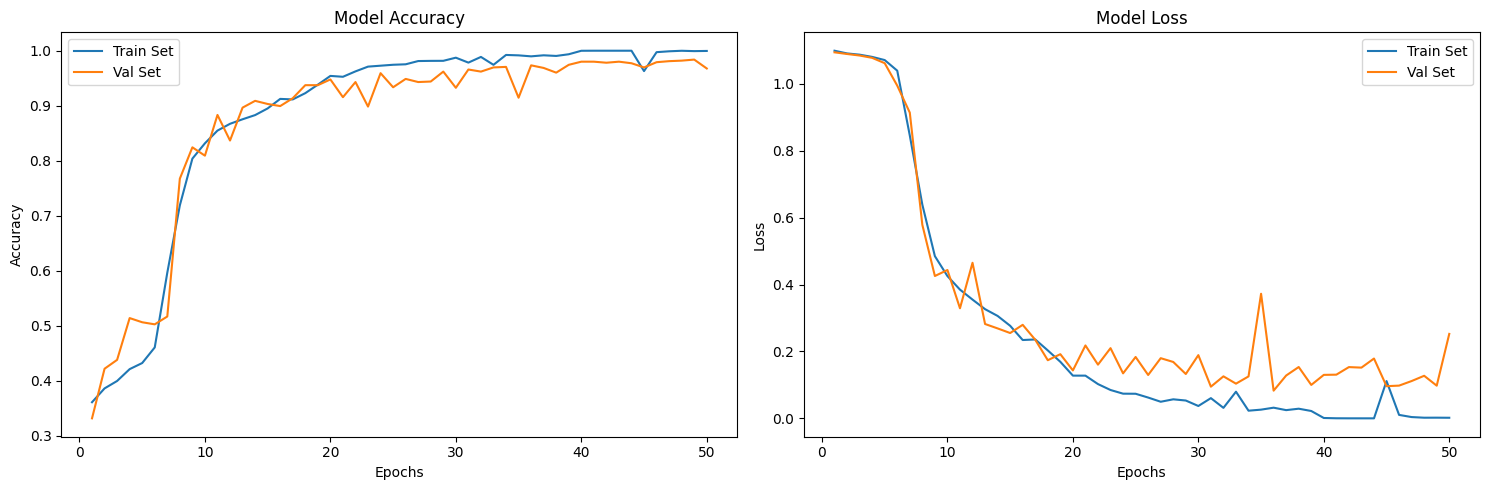

20/20 [==============================] - 1s 32ms/step - loss: 0.2910 - accuracy: 0.9446
Test Accuracy:  94.46
              precision    recall  f1-score   support

      glioma     0.9888    0.9266    0.9567       286
  meningioma     0.9286    0.9155    0.9220       142
   pituitary     0.8981    0.9946    0.9439       186

    accuracy                         0.9446       614
   macro avg     0.9385    0.9456    0.9408       614
weighted avg     0.9474    0.9446    0.9448       614



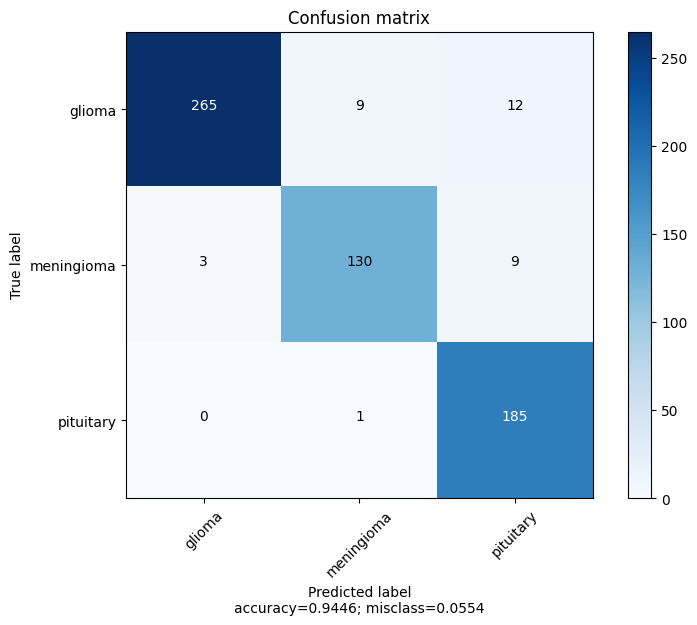

In [54]:
labels = ['glioma', 'meningioma', 'pituitary']
data_path = '/root/autodl-tmp/dataset/figshare_MBTD/augmented'
image_size = 224
x_train, x_test, y_train, y_test = load_data(data_path, labels, image_size)


model = load_model()
adam = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])
tensorboard = TensorBoard(log_dir = 'logs')
checkpoint = ModelCheckpoint(filepath='WeightedEM.h5',
                             monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy', factor = 0.3, patience = 5, min_delta = 0.001,
                              mode='auto',verbose=1)
time_callback = TimeHistory()
history = model.fit(x_train,y_train,validation_split=0.1, epochs =50, verbose=1, batch_size=36,
                   callbacks=[tensorboard,checkpoint,reduce_lr, time_callback])


draw_curve(history)
pred = model.predict(x_test)
pred = np.argmax(pred,axis=1)
y_test_new = np.argmax(y_test,axis=1)
loss,acc = model.evaluate(x_test,y_test,verbose = 1)
draw_matrix(labels, y_test_new, pred, acc)
%reset -f

  1%|          | 24/3420 [00:00<00:14, 235.42it/s]

100%|██████████| 186/186 [00:00<00:00, 192.40it/s]


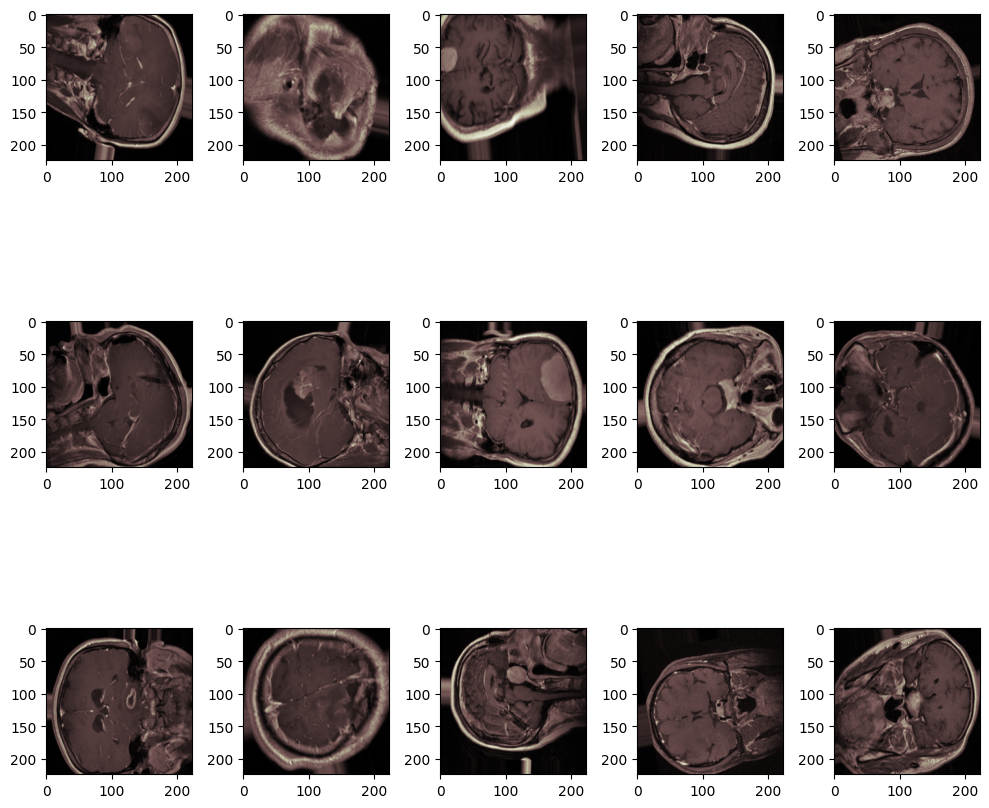

2024-03-15 23:03:45.647400: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI AVX512_BF16 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-15 23:03:45.963659: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 22134 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4090, pci bus id: 0000:41:00.0, compute capability: 8.9


Epoch 1/50


2024-03-15 23:03:54.838780: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8200
2024-03-15 23:03:55.685173: W tensorflow/stream_executor/gpu/asm_compiler.cc:230] Falling back to the CUDA driver for PTX compilation; ptxas does not support CC 8.9
2024-03-15 23:03:55.685188: W tensorflow/stream_executor/gpu/asm_compiler.cc:233] Used ptxas at ptxas
2024-03-15 23:03:55.685242: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] UNIMPLEMENTED: ptxas ptxas too old. Falling back to the driver to compile.
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.
2024-03-15 23:03:56.531385: I tensorflow/stream_executor/cuda/cuda_blas.cc:1786] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


264/264 [==============================] - ETA: 0s - loss: 0.8875 - accuracy: 0.5514
Epoch 1: val_accuracy improved from -inf to 0.79886, saving model to WeightedEM.h5
Epoch 1: 34.88 seconds
264/264 [==============================] - 35s 113ms/step - loss: 0.8875 - accuracy: 0.5514 - val_loss: 0.5373 - val_accuracy: 0.7989 - lr: 1.0000e-04
Epoch 2/50
263/264 [============================>.] - ETA: 0s - loss: 0.4915 - accuracy: 0.8038
Epoch 2: val_accuracy improved from 0.79886 to 0.87856, saving model to WeightedEM.h5
Epoch 2: 28.43 seconds
264/264 [==============================] - 28s 108ms/step - loss: 0.4912 - accuracy: 0.8039 - val_loss: 0.3469 - val_accuracy: 0.8786 - lr: 1.0000e-04
Epoch 3/50
263/264 [============================>.] - ETA: 0s - loss: 0.3817 - accuracy: 0.8507
Epoch 3: val_accuracy improved from 0.87856 to 0.90133, saving model to WeightedEM.h5
Epoch 3: 28.55 seconds
264/264 [==============================] - 29s 108ms/step - loss: 0.3814 - accuracy: 0.8508 - val

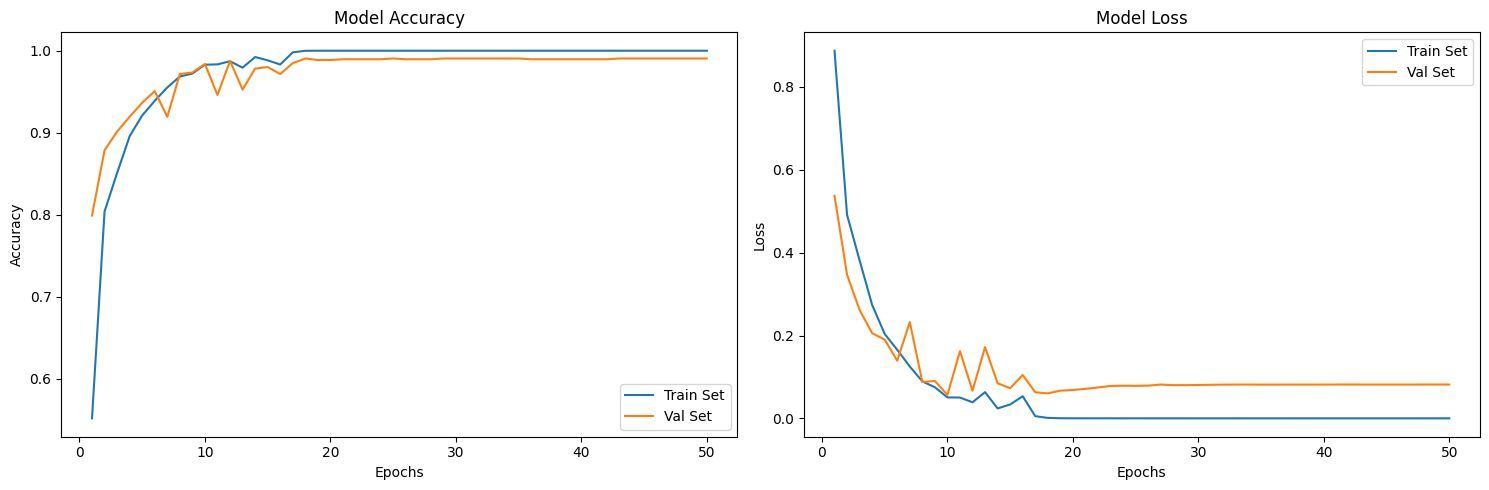

20/20 [==============================] - 1s 32ms/step - loss: 0.1628 - accuracy: 0.9691
Test Accuracy:  96.91
              precision    recall  f1-score   support

      glioma     0.9689    0.9790    0.9739       286
  meningioma     0.9706    0.9296    0.9496       142
   pituitary     0.9683    0.9839    0.9760       186

    accuracy                         0.9691       614
   macro avg     0.9692    0.9642    0.9665       614
weighted avg     0.9691    0.9691    0.9689       614



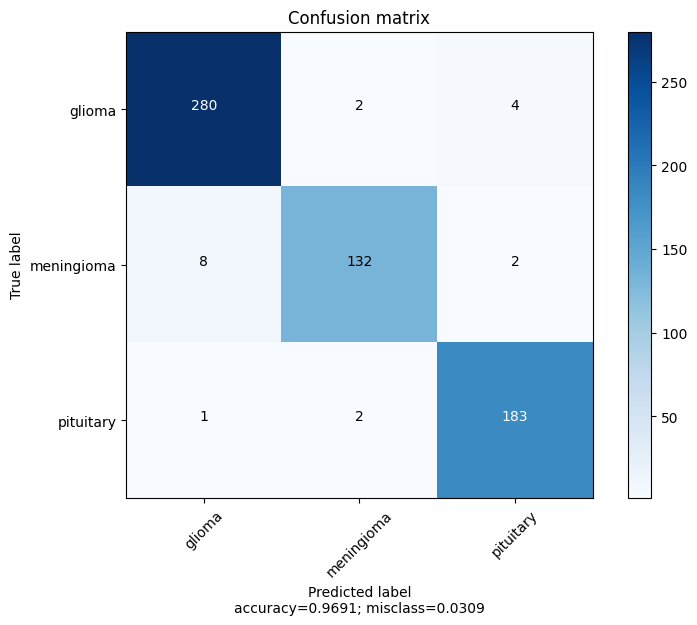

In [3]:
labels = ['glioma', 'meningioma', 'pituitary']
data_path = '/root/autodl-tmp/dataset/figshare_MBTD/augmented'
image_size = 224
x_train, x_test, y_train, y_test = load_data(data_path, labels, image_size)


model = load_model()
adam = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])
tensorboard = TensorBoard(log_dir = 'logs')
checkpoint = ModelCheckpoint(filepath='WeightedEM.h5',
                             monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy', factor = 0.3, patience = 5, min_delta = 0.001,
                              mode='auto',verbose=1)
time_callback = TimeHistory()
history = model.fit(x_train,y_train,validation_split=0.1, epochs =50, verbose=1, batch_size=36,
                   callbacks=[tensorboard,checkpoint,reduce_lr, time_callback])


draw_curve(history)
pred = model.predict(x_test)
pred = np.argmax(pred,axis=1)
y_test_new = np.argmax(y_test,axis=1)
loss,acc = model.evaluate(x_test,y_test,verbose = 1)
draw_matrix(labels, y_test_new, pred, acc)
%reset -f

100%|██████████| 186/186 [00:00<00:00, 190.92it/s]


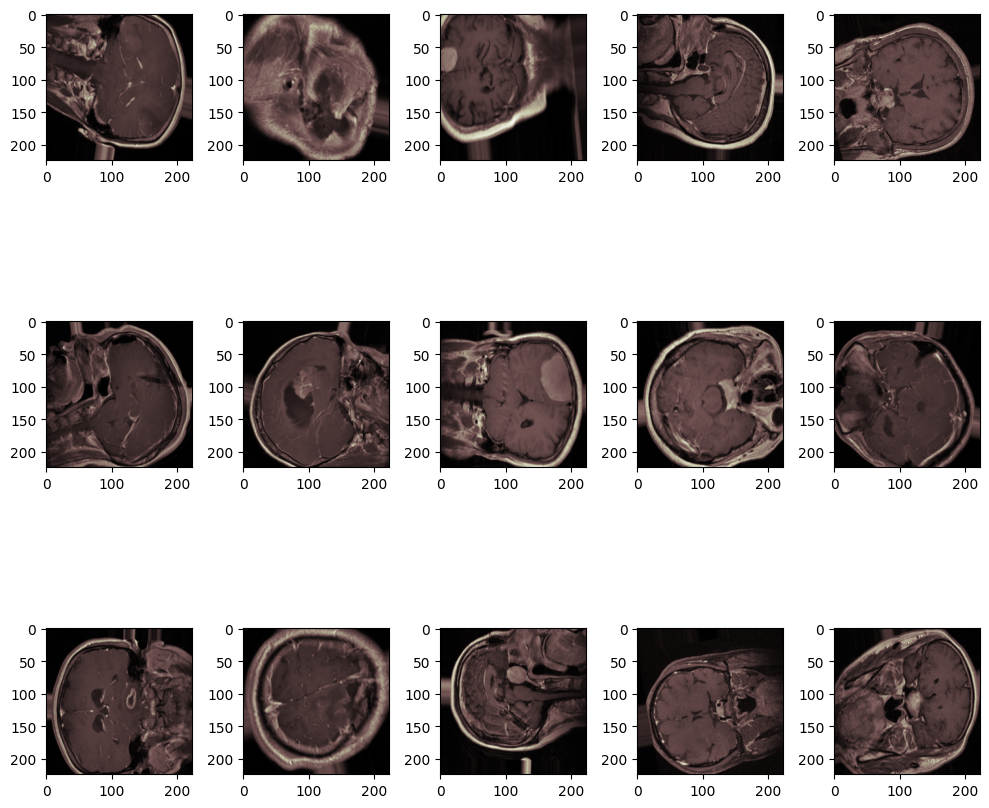

Epoch 1/50
263/264 [============================>.] - ETA: 0s - loss: 0.9513 - accuracy: 0.4936
Epoch 1: val_accuracy improved from -inf to 0.45066, saving model to WeightedEM.h5
Epoch 1: 30.79 seconds
264/264 [==============================] - 31s 110ms/step - loss: 0.9512 - accuracy: 0.4937 - val_loss: 1.0005 - val_accuracy: 0.4507 - lr: 1.0000e-04
Epoch 2/50
263/264 [============================>.] - ETA: 0s - loss: 0.6596 - accuracy: 0.7111
Epoch 2: val_accuracy improved from 0.45066 to 0.83871, saving model to WeightedEM.h5
Epoch 2: 28.62 seconds
264/264 [==============================] - 29s 108ms/step - loss: 0.6590 - accuracy: 0.7114 - val_loss: 0.4024 - val_accuracy: 0.8387 - lr: 1.0000e-04
Epoch 3/50
263/264 [============================>.] - ETA: 0s - loss: 0.4448 - accuracy: 0.8241
Epoch 3: val_accuracy improved from 0.83871 to 0.84250, saving model to WeightedEM.h5
Epoch 3: 28.57 seconds
264/264 [==============================] - 29s 108ms/step - loss: 0.4446 - accuracy: 0

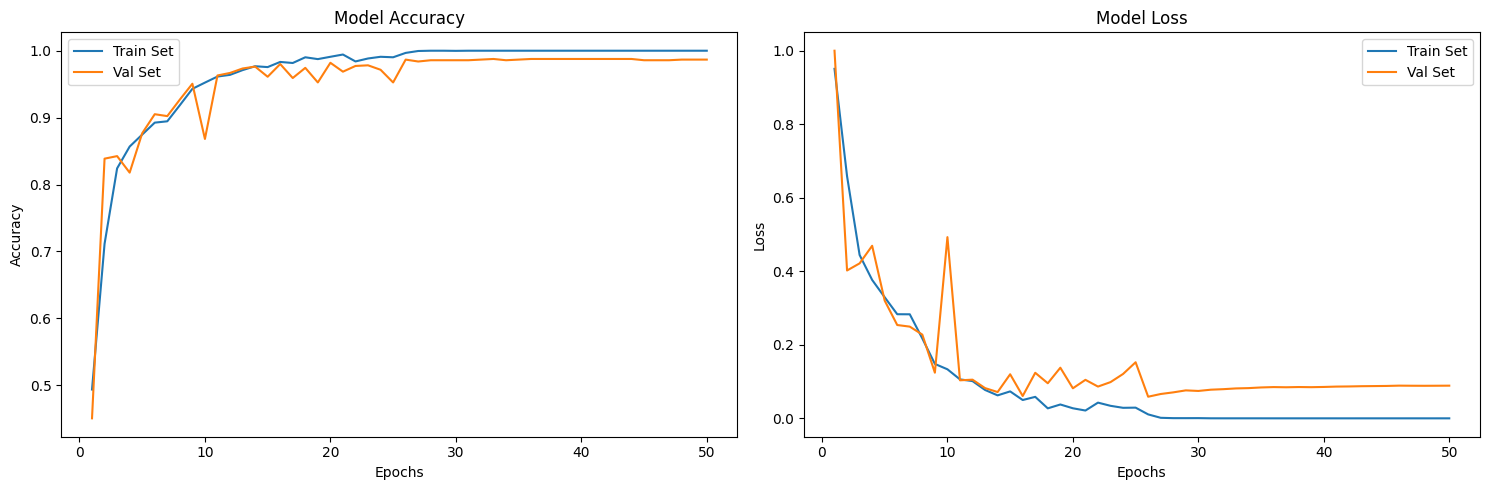

20/20 [==============================] - 1s 32ms/step - loss: 0.2618 - accuracy: 0.9658
Test Accuracy:  96.58
              precision    recall  f1-score   support

      glioma     0.9656    0.9825    0.9740       286
  meningioma     0.9489    0.9155    0.9319       142
   pituitary     0.9785    0.9785    0.9785       186

    accuracy                         0.9658       614
   macro avg     0.9643    0.9588    0.9615       614
weighted avg     0.9657    0.9658    0.9656       614



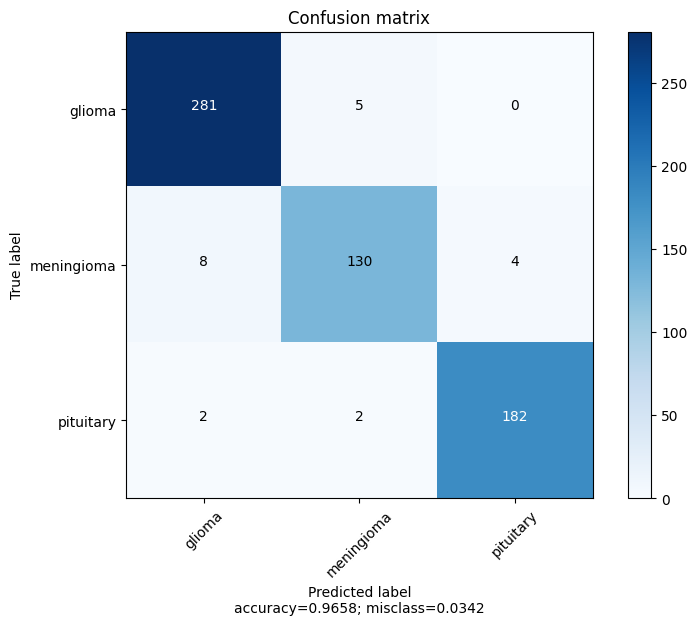

In [6]:
labels = ['glioma', 'meningioma', 'pituitary']
data_path = '/root/autodl-tmp/dataset/figshare_MBTD/augmented'
image_size = 224
x_train, x_test, y_train, y_test = load_data(data_path, labels, image_size)


model = load_model()
adam = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])
tensorboard = TensorBoard(log_dir = 'logs')
checkpoint = ModelCheckpoint(filepath='WeightedEM.h5',
                             monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy', factor = 0.3, patience = 5, min_delta = 0.001,
                              mode='auto',verbose=1)
time_callback = TimeHistory()
history = model.fit(x_train,y_train,validation_split=0.1, epochs =50, verbose=1, batch_size=36,
                   callbacks=[tensorboard,checkpoint,reduce_lr, time_callback])


draw_curve(history)
pred = model.predict(x_test)
pred = np.argmax(pred,axis=1)
y_test_new = np.argmax(y_test,axis=1)
loss,acc = model.evaluate(x_test,y_test,verbose = 1)
draw_matrix(labels, y_test_new, pred, acc)
%reset -f

100%|██████████| 186/186 [00:00<00:00, 192.41it/s]


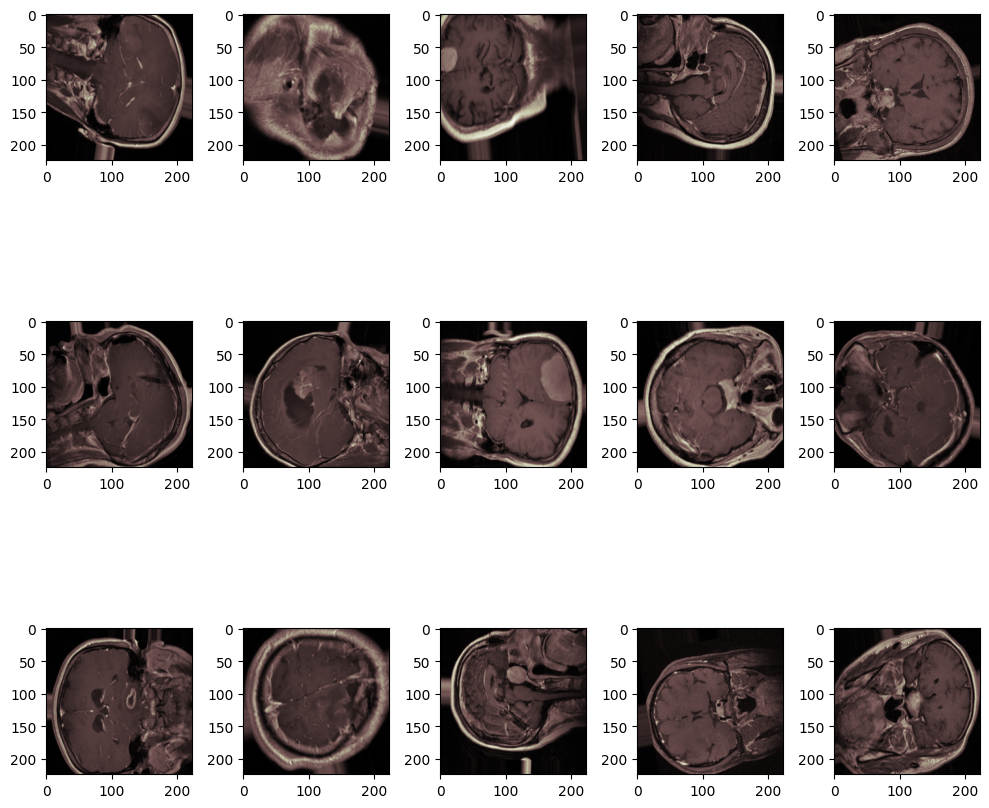

2024-03-16 00:20:22.393280: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI AVX512_BF16 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-16 00:20:22.689533: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 22134 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4090, pci bus id: 0000:41:00.0, compute capability: 8.9


Epoch 1/50


2024-03-16 00:20:31.468796: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8200
2024-03-16 00:20:32.306024: W tensorflow/stream_executor/gpu/asm_compiler.cc:230] Falling back to the CUDA driver for PTX compilation; ptxas does not support CC 8.9
2024-03-16 00:20:32.306040: W tensorflow/stream_executor/gpu/asm_compiler.cc:233] Used ptxas at ptxas
2024-03-16 00:20:32.306091: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] UNIMPLEMENTED: ptxas ptxas too old. Falling back to the driver to compile.
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.
2024-03-16 00:20:33.141259: I tensorflow/stream_executor/cuda/cuda_blas.cc:1786] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


264/264 [==============================] - ETA: 0s - loss: 0.9513 - accuracy: 0.4957
Epoch 1: val_accuracy improved from -inf to 0.68691, saving model to WeightedEM.h5
Epoch 1: 34.97 seconds
264/264 [==============================] - 35s 114ms/step - loss: 0.9513 - accuracy: 0.4957 - val_loss: 0.7761 - val_accuracy: 0.6869 - lr: 1.0000e-04
Epoch 2/50
263/264 [============================>.] - ETA: 0s - loss: 0.5493 - accuracy: 0.7665
Epoch 2: val_accuracy improved from 0.68691 to 0.85199, saving model to WeightedEM.h5
Epoch 2: 28.53 seconds
264/264 [==============================] - 29s 108ms/step - loss: 0.5489 - accuracy: 0.7666 - val_loss: 0.3864 - val_accuracy: 0.8520 - lr: 1.0000e-04
Epoch 3/50
263/264 [============================>.] - ETA: 0s - loss: 0.3936 - accuracy: 0.8414
Epoch 3: val_accuracy improved from 0.85199 to 0.87192, saving model to WeightedEM.h5
Epoch 3: 28.44 seconds
264/264 [==============================] - 28s 108ms/step - loss: 0.3935 - accuracy: 0.8414 - val

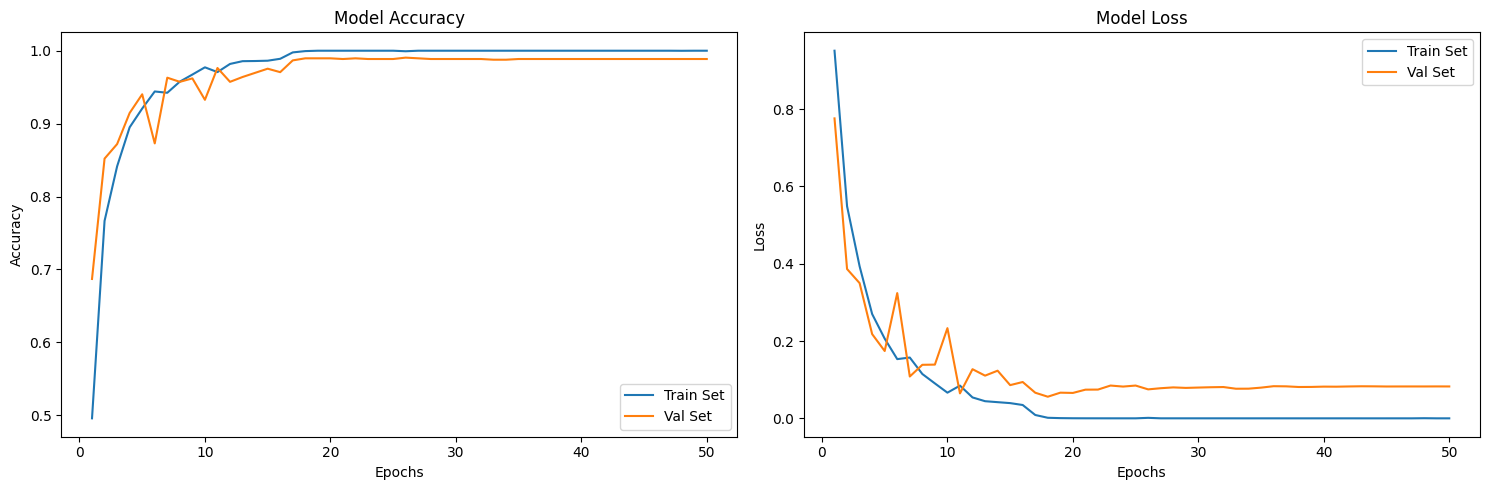

20/20 [==============================] - 1s 32ms/step - loss: 0.2434 - accuracy: 0.9593
Test Accuracy:  95.93
              precision    recall  f1-score   support

      glioma     0.9556    0.9790    0.9672       286
  meningioma     0.9549    0.8944    0.9236       142
   pituitary     0.9681    0.9785    0.9733       186

    accuracy                         0.9593       614
   macro avg     0.9595    0.9506    0.9547       614
weighted avg     0.9592    0.9593    0.9590       614



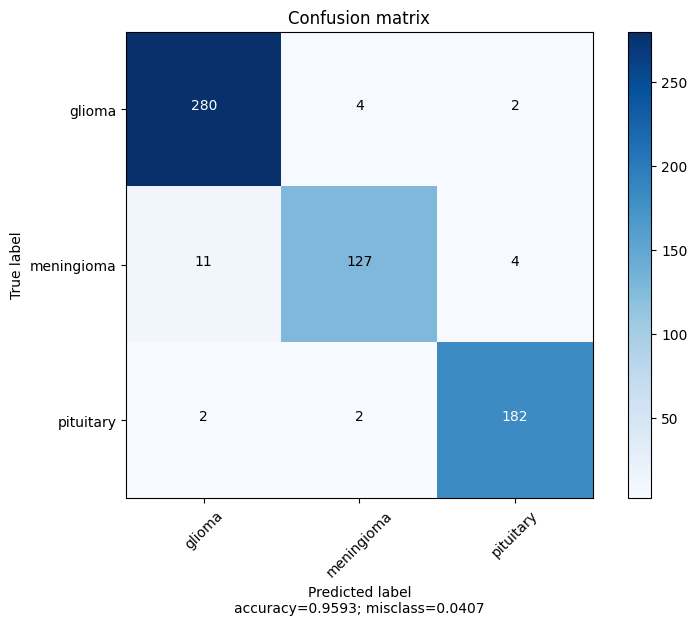

In [3]:
labels = ['glioma', 'meningioma', 'pituitary']
data_path = '/root/autodl-tmp/dataset/figshare_MBTD/augmented'
image_size = 224
x_train, x_test, y_train, y_test = load_data(data_path, labels, image_size)


model = load_model()
adam = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])
tensorboard = TensorBoard(log_dir = 'logs')
checkpoint = ModelCheckpoint(filepath='WeightedEM.h5',
                             monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy', factor = 0.3, patience = 5, min_delta = 0.001,
                              mode='auto',verbose=1)
time_callback = TimeHistory()
history = model.fit(x_train,y_train,validation_split=0.1, epochs =50, verbose=1, batch_size=36,
                   callbacks=[tensorboard,checkpoint,reduce_lr, time_callback])


draw_curve(history)
pred = model.predict(x_test)
pred = np.argmax(pred,axis=1)
y_test_new = np.argmax(y_test,axis=1)
loss,acc = model.evaluate(x_test,y_test,verbose = 1)
draw_matrix(labels, y_test_new, pred, acc)
%reset -f